In [32]:
import numpy as np
import pandas as pd

municipalities = pd.read_csv('/Users/RodolfoSaldanha/Desktop/IP/7_lecture/HW7/municipalities.csv', header=None)
municipalities_nif  = pd.read_csv('/Users/RodolfoSaldanha/Desktop/IP/7_lecture/HW7/municipalities_.csv')
popsize = pd.read_csv('/Users/RodolfoSaldanha/Desktop/IP/7_lecture/HW7/popsize.csv', delimiter=';', header=None)
proc = pd.read_csv('/Users/RodolfoSaldanha/Desktop/IP/7_lecture/HW7/proc_2013.csv', delimiter=';')
cpv = pd.read_excel('/Users/RodolfoSaldanha/Desktop/IP/7_lecture/HW7/cpv_codes.xlsx', sheet_name='CPV codes')

In [33]:
col1 = ['municipality']

municipalities.columns = (col1)
municipalities.head()

,municipality
0,ABRANTES
1,AGUIAR DA BEIRA
2,ALANDROAL
3,ALBERGARIA-A-VELHA
4,ALBUFEIRA


In [34]:
municipalities_nif.head()

,id,contracting,NIF,Name
0,51,Município de Lisboa (500051070),500051070,Município de Lisboa
1,64,Município de Mértola (503279765),503279765,Município de Mértola
2,73,Município do Barreiro (506673626),506673626,Município do Barreiro
3,136,Município do Entroncamento (501120149),501120149,Município do Entroncamento
4,160,Município de Santarém (505941350),505941350,Município de Santarém


In [35]:
col2 = ['municipality', 'pop']
popsize = popsize.iloc[:, :-1]
popsize.columns = col2
popsize.head()

,municipality,pop
0,Arcos de Valdevez,22 284
1,Caminha,16 465
2,Melgaço,8 874
3,Monção,18 931
4,Paredes de Coura,9 039


In [36]:
proc.drop(proc.columns[0], axis = 1, inplace=True)

# Remove euro sign
proc['initialValue'] = proc['initialValue'].str.replace('€', '')
proc['finalValue'] = proc['finalValue'].str.replace('€', '')

# Remove dot in the middle of the number
proc['initialValue'] = proc['initialValue'].str.replace('.', '')
proc['finalValue'] = proc['finalValue'].str.replace('.', '')

# Replace the commas by dots to facilitate the conversion of string to float
proc['initialValue'] = proc['initialValue'].str.replace(',', '.')
proc['finalValue'] = proc['finalValue'].str.replace(',', '.')

# Replace slash by nan
proc['finalValue'] = proc['finalValue'].replace('-', np.nan)

# Convert string to float
proc['initialValue'] = proc['initialValue'].astype(float)
proc['finalValue'] = proc['finalValue'].astype(float)

proc.head()

,ID,dateBase,type,description,contracting,contractor,CPV,initialDate,initialValue,proposedDuration,local,closingDate,finalValue
0,3046974,21-02-2017,Aquisição de serviços,PT EMPRESAS / MEO,"EPRALIMA - Escola Profissional do Alto Lima, C...",MEO (504615947),"64000000-6, Serviços postais e de telecomunica...",01-12-2013,247.00,744 dias,"Portugal, Viana do Castelo, Arcos de Valdevez",-,NaN
1,2332852,09-08-2016,Aquisição de serviços,CP 07/2013 - Aquisição de serviços de saúde no...,"Rádio e Televisão de Portugal, S. A. (500225680)","Atlanticare, Serviços Saúde S.A. (507528212)","85147000-1, Serviços de medicina do trabalho",01-12-2013,69744.24,365 dias,Portugal,-,NaN
2,1467402,29-05-2015,Aquisição de serviços,Prestação Serviços Médicos-Especialidade de Ci...,Centro Hospitalar do Oeste (510412009),GS24 (507824652),"85121000-3, Serviços de prática médica",01-12-2013,12775.62,31 dias,"Portugal, Leiria, Caldas da Rainha",31-12-2013,12775.62
3,1407921,17-03-2015,Aquisição de serviços,Aquisição de Serviços de Seguros no Ramo Acide...,"Centro Hospitalar de São João, E. P. E. (50982...",Isaura Manuela Silva Santos (209910496),"66510000-8, Serviços de seguros",01-12-2013,112120.04,31 dias,"Portugal, Porto, Porto",-,NaN
4,1177748,01-09-2014,Aquisição de serviços,310/AgdA/2013,"AgdA - Águas Públicas do Alentejo, S. A. (5091...",ALEXANDRE GUERREIRO FIGUEIREDO (219339996),"79100000-5, Serviços jurídicos",01-12-2013,12000.00,365 dias,"Portugal, Beja",30-11-2014,12000.00


In [37]:
cpv.head()

,CODE,EN,PT
0,03000000-1,"Agricultural, farming, fishing, forestry and r...","Produtos da agricultura, da pesca, da silvicul..."
1,03100000-2,Agricultural and horticultural products,Produtos agrícolas e hortofrutícolas
2,03110000-5,"Crops, products of market gardening and hortic...","Cereais, produtos de culturas industriais e da..."
3,03111000-2,Seeds,Sementes
4,03111100-3,Soya beans,Soja


In [38]:
proc.dtypes

ID                    int64
dateBase             object
type                 object
description          object
contracting          object
contractor           object
CPV                  object
initialDate          object
initialValue        float64
proposedDuration     object
local                object
closingDate          object
finalValue          float64
dtype: object

In [39]:
# Split CPV into description and code
proc['CPV_description'] = proc['CPV'].str.split(',').str[1]
proc['CPV_code'] = proc['CPV'].str.split(',').str[0]

# Separate contracting and contracted into name and NIF of each one.
proc['contracting_name'] = proc['contracting'].map(lambda x: str(x)[:-11])
proc['contractor_name'] = proc['contractor'].map(lambda x: str(x)[:-11])
proc['contracting_nif'] = proc['contracting'].map(lambda x: str(x)[-11:])
proc['contractor_nif'] = proc['contractor'].map(lambda x: str(x)[-11:])

proc['contracting_nif'] = proc['contracting_nif'].replace('/(',)

In [40]:
# Remove the parentheses of the NIF and convert to int
proc['contracting_nif'] = proc['contracting_nif'].str.replace('(','')
proc['contracting_nif'] = proc['contracting_nif'].str.replace(')','')
proc['contracting_nif'] = pd.to_numeric(proc['contracting_nif'])

In [41]:
# Look for the contracting names started by Município d
municipalProc = proc.loc[proc['contracting_name'].str.contains("^Município d|^Municipio d")]

# Create a column with the municipalities without Município d something
municipalProc['municipality'] = municipalProc['contracting_name'].map(lambda x: str(x)[13:])
municipalProc['municipality'] = municipalProc['municipality'].str.strip()

/Users/RodolfoSaldanha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/RodolfoSaldanha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [42]:
# Remove the Município d part and create a new row with only the municipality name
municipalities_nif['Simple Name'] = municipalities_nif['Name'].map(lambda x: str(x)[13:])

# Compare the size of the longest name of a municipality with the contracting names in order to
# remove the contrating name that are concatened with others.
municipalProc = municipalProc[municipalProc['municipality'].apply(len) <= municipalities_nif['Name'].apply(len).max()]
municipalProc

,ID,dateBase,type,description,contracting,contractor,CPV,initialDate,initialValue,proposedDuration,local,closingDate,finalValue,CPV_description,CPV_code,contracting_name,contractor_name,contracting_nif,contractor_nif,municipality
40,1643358,06-10-2015,Locação de bens móveis,CPI/5/2013/DMC,Município do Porto (501306099),"Suma, Serviços Urbanos e Meio Ambiente, S.A. (...","34144511-3, Veículos para recolha de lixo",02-12-2013,576000.00,1800 dias,"Portugal, Porto, Porto",-,NaN,Veículos para recolha de lixo,34144511-3,Município do Porto,"Suma, Serviços Urbanos e Meio Ambiente, S.A.",501306099,(503210560),Porto
60,1165127,26-08-2014,Aquisição de serviços,Aquisição de serviços de aluguer de camião par...,Município de Nisa (506612287),Valnor-Valorização e Tratamento de Resíduos Só...,"90000000-7, Serviços relativos a águas residua...",02-12-2013,12000.00,240 dias,"Portugal, Portalegre, Nisa",31-12-2013,840.00,Serviços relativos a águas residuais,90000000-7,Município de Nisa,Valnor-Valorização e Tratamento de Resíduos Só...,506612287,(505255090),Nisa
80,1045565,24-04-2014,Empreitadas de obras públicas,Valorizar as Pessoas: Educação – Parque Escola...,Município de Matosinhos (501305912),"CPCMS – Construção, Manutenção e Serviços, S.A...","45421000-4, Obras de marcenaria",02-12-2013,12280.00,30 dias,"Portugal, Porto, Matosinhos",-,12213.44,Obras de marcenaria,45421000-4,Município de Matosinhos,"CPCMS – Construção, Manutenção e Serviços, S.A.",501305912,(510212948),Matosinhos
149,948903,14-01-2014,Aquisição de serviços,Projeto Formação-Ação - Qualificação dos Profi...,Município de Constância (506826546),Fundação Cefa - Fundação para os Estudos e For...,"80000000-4, Serviços de ensino e formação",02-12-2013,34392.75,365 dias,"Portugal, Santarém, Constancia",31-12-2014,34392.75,Serviços de ensino e formação,80000000-4,Município de Constância,Fundação Cefa - Fundação para os Estudos e For...,506826546,(509641601),Constância
185,928676,27-12-2013,Aquisição de serviços,Ajuste Direto do Espectaculo Piromusical 2013-...,Município de Beja (504884620),Henrique Costa & Filhos Lda (504106880),"92360000-2, Serviços de pirotecnia",02-12-2013,6000.00,1 dias,"Portugal, Beja, Beja",03-01-2014,6000.00,Serviços de pirotecnia,92360000-2,Município de Beja,Henrique Costa & Filhos Lda,504884620,(504106880),Beja
186,927974,26-12-2013,Aquisição de bens móveis,01/DAF/2013,Município de Miranda do Douro (506806898),"HAWORTH PORTUGAL - MOBILIARIO DE ESCRITORIO, S...","39130000-2, Mobiliário de escritório",02-12-2013,8280.00,20 dias,"Portugal, Braganca, Miranda do Douro",19-12-2013,8280.00,Mobiliário de escritório,39130000-2,Município de Miranda do Douro,"HAWORTH PORTUGAL - MOBILIARIO DE ESCRITORIO, SA",506806898,(500077622),Miranda do Douro
191,926949,23-12-2013,Aquisição de serviços,N.º05.01/105/DMRH/DGRH/13,Município de Lisboa (500051070),Rafael de Carvalho Lucas Pereira (210849835),"98300000-6, Serviços diversos",02-12-2013,165564.00,1460 dias,"Portugal, Lisboa, Lisboa",25-10-2017,169281.18,Serviços diversos,98300000-6,Município de Lisboa,Rafael de Carvalho Lucas Pereira,500051070,(210849835),Lisboa
192,926921,23-12-2013,Aquisição de serviços,N.º05.01/55/DMRH/DGRH/13,Município de Lisboa (500051070),Ana Margarida Calado Rosmaninho (213872463),"98300000-6, Serviços diversos",02-12-2013,165564.00,1460 dias,"Portugal, Lisboa, Lisboa",21-02-2016,96789.91,Serviços diversos,98300000-6,Município de Lisboa,Ana Margarida Calado Rosmaninho,500051070,(213872463),Lisboa
199,925285,20-12-2013,Empreitadas de obras públicas,Execução coerciva de demolição e trabalhos de ...,Município de Ovar (501306269),"Lavouraproject Unipessoal, Lda. (509256732)","45110000-1, Demolição e destruição de edifício...",02-12-2013,1530.00,5 dias,"Portugal, Aveiro, Ovar",-,NaN,Demolição e destruição de edifícios e movimen...,45110000-1,Município de Ovar,"Lavouraproject Unipessoal, Lda.",501306269,(509256732),Ovar
203,923650,19-12-2013,Aquisição de serviços,30/2013,Município de Ansião (506605930),Anab

In [43]:
# Change the date to pandas date type 
municipalProc['initialDate'] = pd.to_datetime(municipalProc['initialDate'])
municipalProc['initialMonth'] = municipalProc['initialDate'].dt.month

In [44]:
expensesByCity = pd.DataFrame(municipalProc.groupby(['municipality'])['municipality','initialValue'].sum()).reset_index()
monthlyExpenses = pd.DataFrame(municipalProc.groupby(['municipality','initialMonth'])['initialValue'].sum()).reset_index()

monthlyExpenses.head()

,municipality,initialMonth,initialValue
0,Abrantes,1,259511.02
1,Abrantes,2,91229.29
2,Abrantes,3,248446.16
3,Abrantes,4,278760.06
4,Abrantes,5,278743.52


In [45]:
# Apply the log to facilitate the vizualition
exp = monthlyExpenses['initialValue'].apply(np.log)

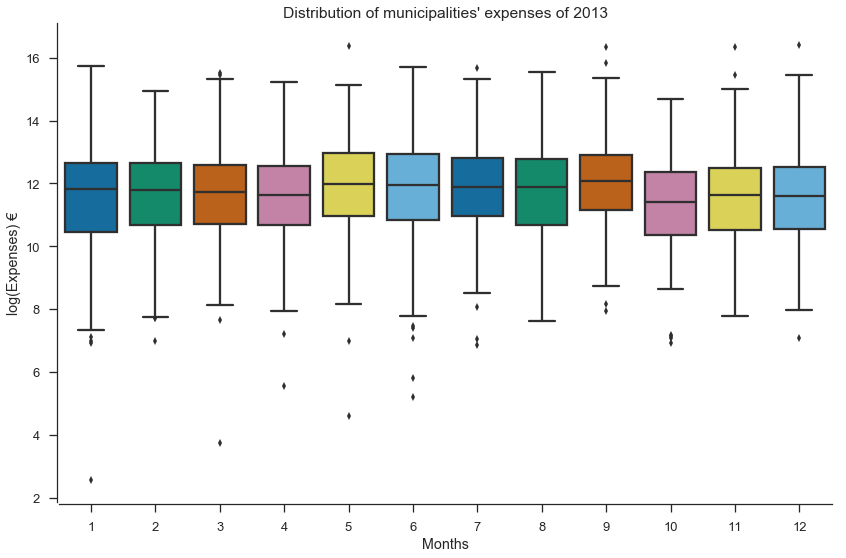

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

# Set up the matplotlib figure
f, (ax3) = plt.subplots(1, figsize=(12, 8), sharex=True)


# Plot boxplot with seaborn
bplot=sns.boxplot(y=exp, x='initialMonth', 
                 data=monthlyExpenses, 
                 width=0.8,
                 palette="colorblind")

bplot.set_xlabel('Months')
bplot.set_ylabel('log(Expenses) €')
bplot.set_title("Distribution of municipalities' expenses of 2013")

plt.tight_layout(h_pad=2)
sns.despine(offset=2)


In [47]:
monthlyProc = pd.DataFrame(municipalProc.groupby(['initialMonth'])['ID'].agg(['count'])).reset_index()
monthlyProc.head()

,initialMonth,count
0,1,1381
1,2,1551
2,3,1561
3,4,1648
4,5,2145


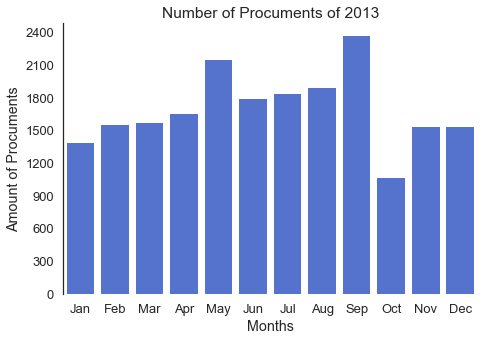

In [48]:
import calendar

sns.set(style="white", context="talk")

# Set up the matplotlib figure
f, (ax3) = plt.subplots(1, figsize=(7, 5), sharex=True)

# Switch the month number to its respective name
month = monthlyProc['initialMonth'].apply(lambda x: calendar.month_abbr[x])

# Label axes
barplot=sns.barplot(x=month ,y=monthlyProc['count'], color='royalblue')
ax3.set_xlabel('Months')
ax3.set_ylabel('Amount of Procuments')
ax3.set_title('Number of Procuments of 2013')

# Finalize the plot
sns.despine(bottom=True)
plt.yticks(np.arange(0, max(monthlyProc['count'])+100, 300))
plt.tight_layout(h_pad=2)

In [49]:
import unicodedata

# Some municipalities had problems with case sensitivity and accentuation in the aggregation
monthlyExpenses['municipality'] = monthlyExpenses['municipality'].str.upper()

def remove_accents(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    return u"".join([c for c in nfkd_form if not unicodedata.combining(c)])

for i in range(0,len(monthlyExpenses['municipality'])):
    monthlyExpenses.loc[i,'municipality'] = remove_accents(monthlyExpenses.loc[i,'municipality'])

# Due to divergencies on the spelling of the cities on the different tables, 
# some municipalities didn't merge correctly. Therefore, since they were just a few,
# it was easier to fix them manuallY

monthlyExpenses['municipality'] = monthlyExpenses['municipality'].replace(
    {'FERREIRA DE ALENTEJO':'FERREIRA DO ALENTEJO',
     'S. PEDRO DO SUL':'SAO PEDRO DO SUL',
     'LAGOA - ACORES':'LAGOA [R.A.A.]',
    'PRAIA DA VITORIA':'VILA DA PRAIA DA VITORIA',
    'RIO MAIOR - CAMARA MUNICIPAL':'RIO MAIOR',
    'CALHETA':'CALHETA [R.A.M.]',
    'CALHETA SAO JORGE':'CALHETA [R.A.A.]'})


yearlyExpenses = pd.DataFrame(monthlyExpenses.groupby(['municipality'])['initialValue'].sum()).reset_index()
yearlyExpenses.head()

,municipality,initialValue
0,ABRANTES,5011422.37
1,AGUEDA,8934304.97
2,AGUIAR DA BEIRA,4715747.01
3,ALANDROAL,2643443.31
4,ALBERGARIA-A-VELHA,4478140.11


In [50]:
aux=popsize["pop"].str.strip()

# Transform the string into float
pt1= aux.str.split().str[0]
pt2= aux.str.split().str[1]
pt2 = pt2.fillna('')

popsize["pop"] = pt1 + pt2
popsize["pop"] = pd.to_numeric(popsize["pop"], downcast='float')
popsize["pop"]

0       22284.0
1       16465.0
2        8874.0
3       18931.0
4        9039.0
5       11829.0
6       43151.0
7       13869.0
8       87570.0
9        9138.0
10      18635.0
11     119824.0
12     181979.0
13      34268.0
14       6929.0
15      47838.0
16      16442.0
17      50097.0
18     156762.0
19       7357.0
20      21867.0
21      12651.0
22     133843.0
23      23856.0
24      21877.0
25      30674.0
26     167771.0
27     135971.0
28     175006.0
29      67971.0
         ...   
278      5648.0
279     14636.0
280      5004.0
281     68822.0
282      6227.0
283     32587.0
284     11320.0
285     35109.0
286     21532.0
287      4405.0
288      3505.0
289      5347.0
290      4701.0
291      6051.0
292      3371.0
293     15004.0
294      1527.0
295      2248.0
296       456.0
297     11334.0
298     34912.0
299    108601.0
300     21242.0
301      8793.0
302      2556.0
303     12961.0
304     43678.0
305      7338.0
306      5467.0
307      5323.0
Name: pop, Length: 308, 

In [51]:
popsize['municipality'] = popsize['municipality'].str.upper()

for i in range(0,len(popsize['municipality'])):
    popsize.loc[i,'municipality'] = remove_accents(popsize.loc[i,'municipality'])

popsize

,municipality,pop
0,ARCOS DE VALDEVEZ,22284.0
1,CAMINHA,16465.0
2,MELGACO,8874.0
3,MONCAO,18931.0
4,PAREDES DE COURA,9039.0
5,PONTE DA BARCA,11829.0
6,PONTE DE LIMA,43151.0
7,VALENCA,13869.0
8,VIANA DO CASTELO,87570.0
9,VILA NOVA DE CERVEIRA,9138.0


In [55]:
yearlyExpensesPop = pd.merge(yearlyExpenses,popsize,
                   how='left',
                   left_on = 'municipality',
                   right_on = 'municipality')
yearlyExpensesPop

,municipality,initialValue,pop
0,ABRANTES,5011422.37,37895.0
1,AGUEDA,8934304.97,47249.0
2,AGUIAR DA BEIRA,4715747.01,5266.0
3,ALANDROAL,2643443.31,5634.0
4,ALBERGARIA-A-VELHA,4478140.11,24816.0
5,ALBUFEIRA,8437273.47,40119.0
6,ALCACER DO SAL,1960934.31,12640.0
7,ALCANENA,770842.92,13490.0
8,ALCOBACA,3274823.86,55844.0
9,ALCOCHETE,712594.26,18293.0


In [56]:
yearlyExpensesPop.loc[yearlyExpensesPop['pop'].isna()]

,municipality,initialValue,pop


In [ ]:
import seaborn as sns
df = sns.load_dataset('iris')
 
t = procValue["initialValue"].apply(np.log)    

# Change shape of marker
sns.regplot(x=procValue["ID"], y=t, fit_reg=False,  scatter_kws={"color":"darkred","alpha":0.3,"s":200})
#sns.plt.show()


In [ ]:
# Get the first digit of CPV_code for the groupby
municipalProc['1d_CPV_code'] = municipalProc['CPV_code'].str[0]

#= pd.DataFrame(municipalProc.groupby(['municipality','initialData','1d_CPV_code'])['initialValue']).reset_index()
municipalProc.groupby(['municipality','initialDate','1d_CPV_code'])['initialValue'].sum()

In [ ]:
municipalProc.groupby(['municipality','initialMonth'])['initialValue']
